## Analysis

In this notebook, the assortativity, or homophily (based on the locality label) of the Harvey and Florence networks are established and tested for significance.

In [29]:
import os
from tex_funcs import set_tex_var as set_tex_var_import
from tex_funcs import df_to_tex as df_to_tex_import
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8) 
plt.rcParams.update({'font.size': 18})

LATEX_DIR = './data/harvey_user_location/latex/'
LATEX_DAT_PATH = './data/harvey_user_location/latex/network-analysis.dat'
LATEX_TABLE_PATH = './data/harvey_user_location/latex/network-analysis-tabs.dat'

def set_tex_var(name, val, dec=3):
    set_tex_var_import(name, val, LATEX_DAT_PATH, dec)

def df_to_tex(df, cols=None, label='UNNAMED', caption='UNDEFINED', 
    width=0.8, row_sep=1, col_widths=None, dec_dict=None,sum_row=False):
    df_to_tex_import(df, LATEX_TABLE_PATH, cols, label, caption, width, row_sep, col_widths, dec_dict,sum_row)

In [18]:
for file in [LATEX_DAT_PATH, LATEX_TABLE_PATH]:
    try:    
        os.remove(file)
    except:
        pass

In [5]:
DIR = './data/harvey_user_location/'
with open(DIR + 'locality_dict_hrv.txt') as json_file:
    hrv_locs = json.load(json_file)
print('Unique Harvey Locs:', len(hrv_locs))

DIR = './data/florence_user_location/'
with open(DIR + 'flr_locs.txt') as json_file:
    flr_locs = json.load(json_file)
print('Unique Florence Locs:', len(flr_locs))

Unique Harvey Locs: 5056
Unique Florence Locs: 29507


In [6]:
set_tex_var('hrvUniqLocs', len(hrv_locs))
set_tex_var('flrUniqLocs', len(flr_locs))

### Harvey Network

In [66]:
import networkx as nx

DIR = './data/harvey_user_location/graph_objs/'
GEXF_FILE = 'network_data_HurricaneHarvey_v1.gexf'
G = nx.read_gexf(DIR + GEXF_FILE)
# Make undirected:
G2 = nx.Graph(G)

In [67]:
Gcc = max(nx.connected_components(G2), key=len)
G_lcc = G2.subgraph(Gcc)

lcc_nodes = '{:,.0f} ({:.2f})'.format(G_lcc.number_of_nodes(), G_lcc.number_of_nodes()/G.number_of_nodes())
lcc_edges = '{:,.0f} ({:.2f})'.format(G_lcc.number_of_edges(), G_lcc.number_of_edges()/G.number_of_edges())

hrv_g_row = {'Event':'Harvey', 'Nodes':'{:,.0f}'.format(G.number_of_nodes()), 'Edges':'{:,.0f}'.format(G.number_of_edges())}
hrv_lcc_row = {'Event':'Harvey$_{LCC}$', 'Nodes':lcc_nodes, 'Edges':lcc_edges}

Gcc = None
G_lcc = None

In [68]:
assort_coef = nx.attribute_assortativity_coefficient(G2, 'lcl_profile')
print('Harvey assortativity for undirected graph:', assort_coef)
assort_coef = nx.attribute_assortativity_coefficient(G, 'lcl_profile')
print('Harvey assortativity for directed graph:', assort_coef)

Harvey assortativity for undirected graph: 0.37909172708250594
Harvey assortativity for directed graph: 0.385031221987116


In [8]:
# Excluding non-geocoded nodes:
partition = [node for node, data in G2.nodes(data=True) if data.get('lcl_profile') != '']
G2 = G2.subgraph(partition)
print('{} nodes reduced to {}'.format(G.number_of_nodes(), G2.number_of_nodes()))

assort_coef_1 = nx.attribute_assortativity_coefficient(G2, 'lcl_profile')
print('Harvey assortativity for non-null profile location nodes, undirected:', assort_coef_1)

G3 = G.subgraph(partition)
assort_coef_2 = nx.attribute_assortativity_coefficient(G3, 'lcl_profile')
print('Harvey assortativity for non-null profile location nodes, directed:', assort_coef_2)

31932 nodes reduced to 21157
Harvey assortativity for non-null profile location nodes, undirected: 0.6165076429568769
Harvey assortativity for non-null profile location nodes, directed: 0.6265234987134032


In [9]:
set_tex_var('hrvAssortCoef', assort_coef_2, 3)

hrv_g_row = {'Event':'Harvey', 'Nodes':orig_nodes, 'Edges':orig_edges}
hrv_g2_row = {'Event':'Harvey$_{LCC}$', 'Nodes':G2.number_of_nodes(), 'Edges':G2.number_of_edges()}
hrv_assort_row = {'Event': 'Harvey', 'Nodes$_{total}$':orig_nodes, 'Nodes$_{filtered}$':G2.number_of_nodes(), 'Assortativity':assort_coef_2}

Assortativity based on the coded label is also calculated. This uses a subgraph of only nodes which have been coded.

In [10]:
G3 = G.copy()

nodes = [
    node
    for node, data
    in G3.nodes(data=True)
    if data.get("user_code") != ""
]
G3 = G3.subgraph(nodes)

attrs = {}
for node, data in G3.nodes(data=True):
    if data.get("user_code") != "Non-Witness":
        attrs[node] = {"user_code":True}
    else:
        attrs[node] = {"user_code":False}
nx.set_node_attributes(G3, attrs)

assort_coef_1 = nx.attribute_assortativity_coefficient(G3, 'user_code')
print('Harvey coded dataset assortativity, directed:', assort_coef)
assort_coef_2 = nx.attribute_assortativity_coefficient(nx.Graph(G3), 'user_code')
print('Harvey coded dataset assortativity, undirected:', assort_coef)


# Check LCC (of full graph)
Gcc = max(nx.connected_components(G2), key=len)
G4 = G3.subgraph(Gcc)

assort_coef_3 = nx.attribute_assortativity_coefficient(G4, 'user_code')
print('Harvey LCC coded dataset assortativity, directed:', assort_coef)
assort_coef_4 = nx.attribute_assortativity_coefficient(nx.Graph(G4), 'user_code')
print('Harvey LCC coded dataset assortativity, undirected:', assort_coef)

Harvey coded dataset assortativity, directed: 0.385031221987116
Harvey coded dataset assortativity, undirected: 0.385031221987116
Harvey LCC coded dataset assortativity, directed: 0.385031221987116
Harvey LCC coded dataset assortativity, undirected: 0.385031221987116


In [11]:
val = assort_coef_1

set_tex_var('hrvAssortCoefCoded', val, 3)

if val >= 0.5:
    interp = 'strong'
elif val >= 0.3:
    interp = 'moderate'
elif val > 0:
    interp = 'low'
else:
    raise Exception('No correlation, check how value is used in document.')
set_tex_var('hrvAssortCoefCodedInterpretation', interp)

### Florence Network
Now the same calculations are repeated for the Florence dataset (excluding the coded subgraph)

In [1]:
import networkx as nx

DIR = './data/florence_user_location/'
# LCC of users detected within first week of event:
GEXF_FILE = 'Florence_network_data_20210721.gexf'
G = nx.read_gexf(DIR + GEXF_FILE)
# Make undirected:
G2 = nx.Graph(G)

In [23]:
########## NOTE: vals hardcoded as file is already the LCC subgraph.
orig_nodes = 124558
orig_edges = 3428659
##########

# Gcc = max(nx.connected_components(G2), key=len)
# G_lcc = G2.subgraph(Gcc)

# lcc_nodes = '{:,.0f} ({:.3f})'.format(G_lcc.number_of_nodes(), G_lcc.number_of_nodes()/G.number_of_nodes())
# lcc_edges = '{:,.0f} ({:.3f})'.format(G_lcc.number_of_edges(), G_lcc.number_of_edges()/G.number_of_edges())

lcc_nodes = '{:,.0f} ({:.2f})'.format(G.number_of_nodes(), G.number_of_nodes()/orig_nodes)
lcc_edges = '{:,.0f} ({:.2f})'.format(G.number_of_edges(), G.number_of_edges()/orig_edges)

flr_g_row = {'Event':'Florence', 'Nodes':'{:,.0f}'.format(orig_nodes), 'Edges':'{:,.0f}'.format(orig_edges)}
flr_lcc_row = {'Event':'Florence$_{LCC}$', 'Nodes':lcc_nodes, 'Edges':lcc_edges}

# Gcc = None
# G_lcc = None

In [ ]:
assort_coef = nx.attribute_assortativity_coefficient(G2, 'lcl_profile')
print('Florence assortativity for undirected graph:', assort_coef)
assort_coef = nx.attribute_assortativity_coefficient(G, 'lcl_profile')
print('Florence assortativity for directed graph:', assort_coef)

In [13]:
# Excluding non-geocoded nodes:
orig_nodes = G2.number_of_nodes()
partition = [node for node, data in G2.nodes(data=True) if data.get('lcl_profile') != None]
G2 = G2.subgraph(partition)
print('{} nodes reduced to {}'.format(orig_nodes, G2.number_of_nodes()))

assort_coef_1 = nx.attribute_assortativity_coefficient(G2, 'lcl_profile')
print('Florence assortativity for non-null profile location nodes, undirected:', assort_coef_1)

G3 = G.subgraph(partition)
assort_coef_2 = nx.attribute_assortativity_coefficient(G3, 'lcl_profile')
print('Florence assortativity for non-null profile location nodes, directed:', assort_coef_2)

106732 nodes reduced to 79807
Florence assortativity for non-null profile location nodes, undirected: 0.560285625242073
Florence assortativity for non-null profile location nodes, directed: 0.5417783804383417


In [14]:
set_tex_var('flrAssortCoef', assort_coef_2, 3)

flr_assort_row = {'Event': 'Florence', 'Nodes$_{total}$':orig_nodes, 'Nodes$_{filtered}$':G2.number_of_nodes(), 'Assortativity':assort_coef_2}

In [19]:
###########################
######### Florence network after exclusion box applied
###########################
import networkx as nx

DIR = './data/florence_user_location/'
# Network of users detected within first week of event:
GEXF_FILE = 'Florence_network_data_exclusion_20210729.gexf'
G = nx.read_gexf(DIR + GEXF_FILE)
# Make undirected:
G2 = nx.Graph(G)


# Gcc = max(nx.connected_components(G2), key=len)
# G_lcc = G2.subgraph(Gcc)

# lcc_nodes = '{:,.0f} ({:.2f})'.format(G_lcc.number_of_nodes(), G_lcc.number_of_nodes()/G.number_of_nodes())
# lcc_edges = '{:,.0f} ({:.2f})'.format(G_lcc.number_of_edges(), G_lcc.number_of_edges()/G.number_of_edges())

# flr_g_row = {'Event':'Florence', 'Nodes':'{:,.0f}'.format(G.number_of_nodes()), 'Edges':'{:,.0f}'.format(G.number_of_edges())}
# flr_lcc_row = {'Event':'Florence$_{LCC}$', 'Nodes':lcc_nodes, 'Edges':lcc_edges}

# Gcc = None
# G_lcc = None

assort_coef = nx.attribute_assortativity_coefficient(G2, 'lcl_prf')
print('Florence (exclusion) assortativity for undirected graph:', assort_coef)
assort_coef = nx.attribute_assortativity_coefficient(G, 'lcl_prf')
print('Florence (exclusion) assortativity for directed graph:', assort_coef)

# Excluding non-geocoded nodes:
orig_nodes = G2.number_of_nodes()
partition = [node for node, data in G2.nodes(data=True) if data.get('lcl_prf') != None]
G2 = G2.subgraph(partition)
print('{} nodes reduced to {}'.format(orig_nodes, G2.number_of_nodes()))

assort_coef_1 = nx.attribute_assortativity_coefficient(G2, 'lcl_prf')
print('Florence assortativity for non-null profile location nodes, undirected:', assort_coef_1)

G3 = G.subgraph(partition)
assort_coef_2 = nx.attribute_assortativity_coefficient(G3, 'lcl_prf')
print('Florence assortativity for non-null profile location nodes, directed:', assort_coef_2)

Florence (exclusion) assortativity for undirected graph: 0.2095158880510173
Florence (exclusion) assortativity for directed graph: 0.18983880059377306
100343 nodes reduced to 68897
Florence assortativity for non-null profile location nodes, undirected: 0.5364163672797281
Florence assortativity for non-null profile location nodes, directed: 0.5130369248901543


In [21]:
#Run again on LCC:
print(G.number_of_nodes(), G.number_of_edges())

G2 = nx.Graph(G)
Gcc = max(nx.connected_components(G2), key=len)
G2 = G2.subgraph(Gcc)
G = G.subgraph(Gcc)

print(G2.number_of_nodes(), G2.number_of_edges())

assort_coef = nx.attribute_assortativity_coefficient(G2, 'lcl_prf')
print('Florence (exclusion) assortativity for undirected graph:', assort_coef)
assort_coef = nx.attribute_assortativity_coefficient(G, 'lcl_prf')
print('Florence (exclusion) assortativity for directed graph:', assort_coef)

# Excluding non-geocoded nodes:
orig_nodes = G2.number_of_nodes()
partition = [node for node, data in G2.nodes(data=True) if data.get('lcl_prf') != None]
G2 = G2.subgraph(partition)
print('{} nodes reduced to {}'.format(orig_nodes, G2.number_of_nodes()))

assort_coef_1 = nx.attribute_assortativity_coefficient(G2, 'lcl_prf')
print('Florence assortativity for non-null profile location nodes, undirected:', assort_coef_1)

G3 = G.subgraph(partition)
assort_coef_2 = nx.attribute_assortativity_coefficient(G3, 'lcl_prf')
print('Florence assortativity for non-null profile location nodes, directed:', assort_coef_2)

100343 2523974
81274 1747636
Florence (exclusion) assortativity for undirected graph: 0.20943478414306793
Florence (exclusion) assortativity for directed graph: 0.18973403303935382
81274 nodes reduced to 60917
Florence assortativity for non-null profile location nodes, undirected: 0.5364150356059781
Florence assortativity for non-null profile location nodes, directed: 0.5130346105509414


In [ ]:
############################
import networkx as nx
DIR = './data/florence_user_location/'

GEXF_FILE = 'Florence_network_data_exclusion_wronglclprf_20210729.gexf'
G = nx.read_gexf(DIR + GEXF_FILE)
print(G.number_of_nodes(), G.number_of_edges())

GEXF_FILE = 'Florence_network_data_exclusion_20210729.gexf'
G = nx.read_gexf(DIR + GEXF_FILE)
print(G.number_of_nodes(), G.number_of_edges())

### Exporting Tables

In [69]:
import pandas as pd

df = pd.DataFrame([hrv_g_row, hrv_lcc_row, {}, flr_g_row, flr_lcc_row])
df = df[['Event', 'Nodes', 'Edges']]
df = df.fillna('')
df

,Event,Nodes,Edges
0,Harvey,"31,932","101,096"
1,Harvey$_{LCC}$,"18,410 (0.58)","76,341 (0.76)"
2,,,
3,Florence,"124,558","3,428,659"
4,Florence$_{LCC}$,"106,732 (0.86)","3,428,033 (1.00)"


In [70]:
df_to_tex(df, label='network-size', caption='Network Sizes', width=0.8, row_sep=0)

Writing df to file as tex...


In [15]:
df = pd.DataFrame([hrv_row, flr_row])
df = df[['Event', 'Nodes$_{total}$', 'Nodes$_{filtered}$', 'Assortativity']]
df

,Event,Nodes$_{total}$,Nodes$_{filtered}$,Assortativity
0,Harvey,31932,21157,0.626523
1,Florence,106732,79807,0.541778


In [16]:
dec_d = {'Nodes$_{total}$':0, 'Nodes$_{filtered}$':0, 'Assortativity':3}
#col_widths = 'X[-1,lm] X[-1,rm] X[-1,rm] X[-1,rm]'
col_widths = None
df_to_tex(df, label='assortativity', caption='Network Assortativity Coefficient', width=0.8, row_sep=0, dec_dict=dec_d, col_widths=col_widths)

Writing df to file as tex...


### Significance Testing
#### Jackknife Method
To test the significance of the findings above, we can calculate the st-dev of the assortativity (or any metric) using the 'jacknife method' in which for each edge, a graph excluding that edge is created and assortativity calculated. 

By regarding each of the M edges as independent, the standard deviation for r satisfies:

$$\sigma^2_r = \sum_{i=1}^{M} (r_i-r)^2$$

where $r_i$ is the value of r for the network in which the ith edge is removed (Newman, 2003, Mixing patterns in networks; B. Efron, 1979, Computers and the Theory of Statistics: Thinking the Unthinkable)

assortativity: 0.6388621022179353


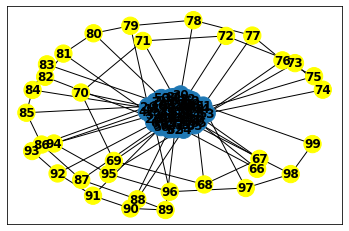

In [41]:
# Creating toy graph for demonstration

import networkx as nx
import random

tot = 100
split = int(tot/3)*2
G = nx.Graph()
G.add_nodes_from([i for i in range(tot)])
attrs = {i:{'lcl':(True if i < split else False)} for i in range(tot)}
nx.set_node_attributes(G, attrs)
node_color = [('#1f78b4' if i < split else '#ffff00') for i in range(tot)]

for n in range(split):
    for m in range(split):
        G.add_edge(n,m)
for n in range(split,tot):
    G.add_edge(n,n-1)
    G.add_edge(n, random.randint(0,split))
#G.add_edge(0,split+1)

assort = nx.attribute_assortativity_coefficient(G, 'lcl')
print('assortativity:', assort)

nx.draw_networkx(G, with_labels=True, node_color=node_color, font_weight='bold')

In [42]:
# Calculate Std Deviation using jackknife method:
import math

print('Edges:', G.number_of_edges())
assort = nx.attribute_assortativity_coefficient(G, 'lcl')

std = 0
for (u,v) in G.edges():
    G2 = G.copy()
    G2.remove_edge(u,v)
    assort_i = nx.attribute_assortativity_coefficient(G2, 'lcl')
    std += (assort_i - assort)**2

print('Assort: {:.4}, std: {:.4}'.format(assort, math.sqrt(std)))

Edges: 2280
Assort: 0.6389, std: 0.05681


#### Monte Carlo Simulations
However, for a large enough graph, iterating through M subgraphs is expensive. As an alternative, we can simulate an ensemble of null models (based on the configuration model) and calculate the mean and standard deviation for their assortativity values. The Z score for the observed value can then be calculated as:

\begin{equation}\label{eq:z-score}
  Z = \frac{r_{observed}-r_{rand}}{\sigma(r_{rand})}
\end{equation}

and converted into a p-value.

In [10]:
import numpy
from scipy.stats import norm

# Simulate n_simulation configuration models of network G and calculate
# assortativity based on label attr_label.

# NOTE: config models may be undirected or otherwise not respect the 
# direction of node edges, needs further testing.

def monte_carlo_sim(G, attr_label, n_simulation, verbose=True):
    if verbose:
        print('Graph nodes: {}, edges: {}'.format(G.number_of_nodes(), G.number_of_edges()))
        
    # Creating parameters for configuration model:
    seq_lbl = [(G.degree(n[0]), n[1][attr_label]) for n in G.nodes(data=True)]
    seq = [x[0] for x in seq_lbl]
    labels = [x[1] for x in seq_lbl]
    index = [i for i in range(len(labels))]
    attrs = dict(zip(index, labels))

    # Generating configuration models:
    config_vals = []
    for i in range(n_simulation):
        if i%int(n_simulation/10) == 0 and verbose:
            print('{:.0f}% -- Generating graph {} of {}'.format(i/N_SIMULATIONS*100, i, N_SIMULATIONS))
        G2 = nx.configuration_model(seq, seed=i**i)
        nx.set_node_attributes(G2, attrs, name=attr_label)
        assort_coef = nx.attribute_assortativity_coefficient(G2, attr_label)
        config_vals.append(assort_coef)

    assort_coef = nx.attribute_assortativity_coefficient(G, attr_label)
    print('\nOriginal Network assortativity: {:.5f}'.format(assort_coef))
    
    config_mean = numpy.array(config_vals).mean()
    config_std = numpy.array(config_vals).std()
    print('\nConfig assort mean: {:.4f}'.format(config_mean))
    print('Config assort std: {:.4f}'.format(config_std))

    zscore = (assort_coef-config_mean)/config_std
    pval = norm.sf(abs(zscore))*2
    print('\nOriginal Network Z-Score: {:.4f}'.format(zscore))
    print('p-val:', pval)
    
    return {'assort_coef':assort_coef,
            'zscore':zscore, 
            'pval':pval,
            'config_mean':config_mean, 
            'config_std':config_std,
            'config_vals':config_vals}

In [20]:
import networkx as nx

DIR = './data/harvey_user_location/graph_objs/'
GEXF_FILE = 'network_data_HurricaneHarvey_v1.gexf'

LCL_PRF_LABEL = 'lcl_profile'
LCL_PRF_NULL_VAL = ''
N_SIMULATION = 100

G = nx.read_gexf(DIR + GEXF_FILE)
#Subset of graph with valid lcl_profile values
nodes = [
    node
    for node, data
    in G.nodes(data=True)
    if data.get(LCL_PRF_LABEL) != LCL_PRF_NULL_VAL
]
G = G.subgraph(nodes)

assort_dict = monte_carlo_sim(G, LCL_PRF_LABEL, N_SIMULATION)

Graph nodes: 21157, edges: 76938
Generating graph 0 of 100
Generating graph 10 of 100
Generating graph 20 of 100
Generating graph 30 of 100
Generating graph 40 of 100
Generating graph 50 of 100
Generating graph 60 of 100
Generating graph 70 of 100
Generating graph 80 of 100
Generating graph 90 of 100

Original Network assortativity: 0.62652

Config assort mean: -0.0005
Config assort std: 0.0034

Original Network Z-Score: 183.0374
p-val: 0.0


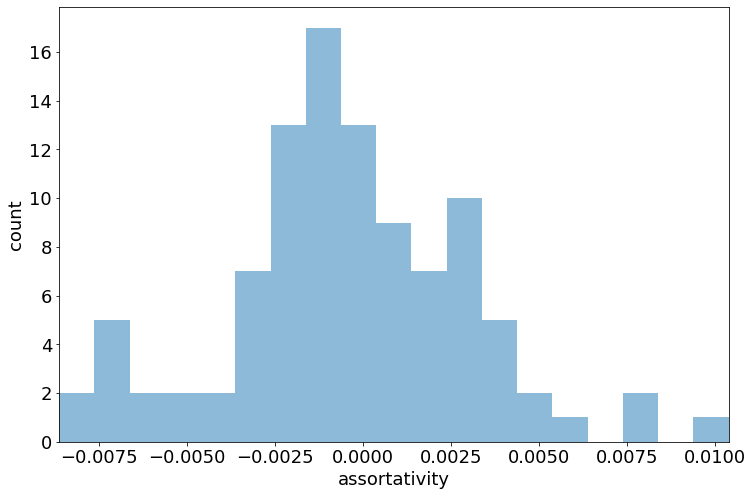

In [30]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8) 
plt.rcParams.update({'font.size': 18})

LATEX_DIR = './data/harvey_user_location/latex/'

data = assort_dict['config_vals']

bins = np.linspace(min(data), max(data), 20) # fixed number of bins

plt.xlim([min(data), max(data)])

plt.hist(data, bins=bins, alpha=0.5)
#plt.title('Assortativity of Configuration Models')
plt.xlabel('assortativity')
plt.ylabel('count')

plt.savefig(LATEX_DIR + 'assort-monte-carlo-dist-hrv.png', bbox_inches='tight')
plt.show()

In [11]:
###
### Repeating simulation for Florence network
###

import networkx as nx

DIR = './data/florence_user_location/'
# LCC of users detected within first week of event:
GEXF_FILE = 'Florence_network_data_20210721.gexf'

LCL_PRF_LABEL = 'lcl_profile'
LCL_PRF_NULL_VAL = None

G = nx.read_gexf(DIR + GEXF_FILE)
#Subset of graph with valid lcl_profile values
nodes = [
    node
    for node, data
    in G.nodes(data=True)
    if data.get(LCL_PRF_LABEL) != LCL_PRF_NULL_VAL
]
G = G.subgraph(nodes)

assort_dict = monte_carlo_sim(G, LCL_PRF_LABEL, N_SIMULATION)

Graph nodes: 79807, edges: 2217826
Generating graph 0 of 100
Generating graph 10 of 100
Generating graph 20 of 100
Generating graph 30 of 100
Generating graph 40 of 100
Generating graph 50 of 100
Generating graph 60 of 100
Generating graph 70 of 100
Generating graph 80 of 100
Generating graph 90 of 100

Original Network assortativity: 0.54178

Config assort mean: -0.0001
Config assort std: 0.0007

Original Network Z-Score: 825.4337
p-val: 0.0


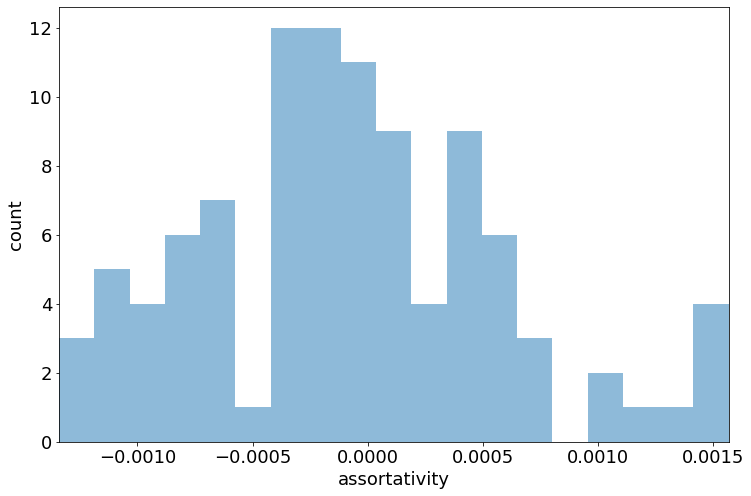

In [16]:
data = assort_dict['config_vals']

bins = np.linspace(min(data), max(data), 20) # fixed number of bins

plt.xlim([min(data), max(data)])

plt.hist(data, bins=bins, alpha=0.5)
#plt.title('Assortativity of Configuration Models')
plt.xlabel('assortativity')
plt.ylabel('count')

plt.savefig(LATEX_DIR + 'assort-monte-carlo-dist-flr.png', bbox_inches='tight')
plt.show()

In [19]:
set_tex_var('MCSimN', N_SIMULATION)

In [47]:
###
###
### TEMP TESTING MONTE CARLO SIM
###
###

assortativity: 0.7738277919863599


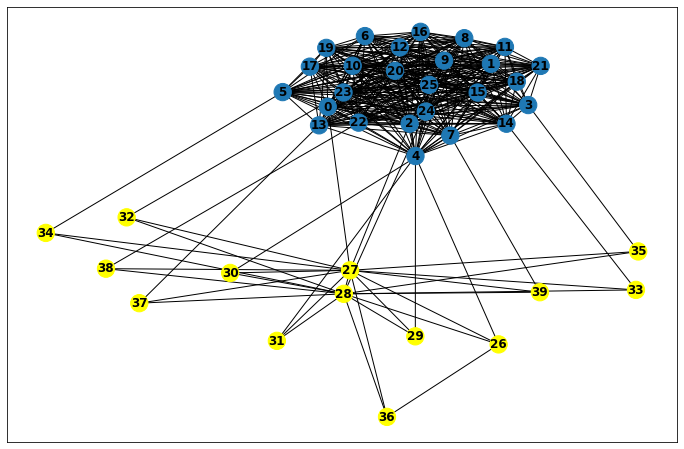

In [41]:
import networkx as nx
import random

tot = 40
split = int(tot/3)*2

G = nx.Graph()
G.add_nodes_from([i for i in range(tot)])

attrs = {i:{'lcl':(True if i < split else False)} for i in range(tot)}
nx.set_node_attributes(G, attrs)

for n in range(split):
    for m in range(split):
        G.add_edge(n,m)
for n in range(split,tot):
    G.add_edge(n,split+1)
    G.add_edge(n,split+2)
    G.add_edge(n, random.randint(0,split))
G.add_edge(0,split+1)


print('assortativity:', nx.attribute_assortativity_coefficient(G, 'lcl'))

node_color = [('#1f78b4' if i < split else '#ffff00') for i in range(tot)]
nx.draw_networkx(G, with_labels=True, node_color=node_color, font_weight='bold')

In [53]:
import numpy

N_SIMULATIONS = 10000

seq_lbl = [(G.degree(n[0]), n[1]['lcl']) for n in G.nodes(data=True)]
seq = [x[0] for x in seq_lbl]
labels = [x[1] for x in seq_lbl]
index = [i for i in range(len(labels))]
attrs = dict(zip(index, labels))

vals = []
for i in range(N_SIMULATIONS):
    if i%int(N_SIMULATIONS/10) == 0:
        print('{:.0f}% - {} of {}'.format(i/N_SIMULATIONS*100, i, N_SIMULATIONS))
    G2 = nx.configuration_model(seq, seed=i**i)
    nx.set_node_attributes(G2, attrs, name='lcl')
    assort_coef = nx.attribute_assortativity_coefficient(G2, 'lcl')
    vals.append(assort_coef)
   
print('\n')
print('Config assort mean:', numpy.array(vals).mean())
print('Config assort std:', numpy.array(vals).std())

#node_color = [('#1f78b4' if i < 10 else '#ffff00') for i in attrs.keys()]
#nx.draw_networkx(G2, with_labels=True, node_color=node_color, font_weight='bold')

0% - 0 of 10000
10% - 1000 of 10000
20% - 2000 of 10000
30% - 3000 of 10000
40% - 4000 of 10000
50% - 5000 of 10000
60% - 6000 of 10000
70% - 7000 of 10000
80% - 8000 of 10000
90% - 9000 of 10000


Config assort mean: -0.007900598733420517
Config assort std: 0.04849160656035515


In [46]:
# import json

# TEMP_FILENAME = './data/harvey_user_location/latex/temp_data.json'

# with open(TEMP_FILENAME, 'w') as outfile:
#     json.dump(vals, outfile)

In [47]:
# import json

# TEMP_FILENAME = './data/harvey_user_location/latex/temp_data.json'

# with open(TEMP_FILENAME) as json_file:
#     vals = json.load(json_file)

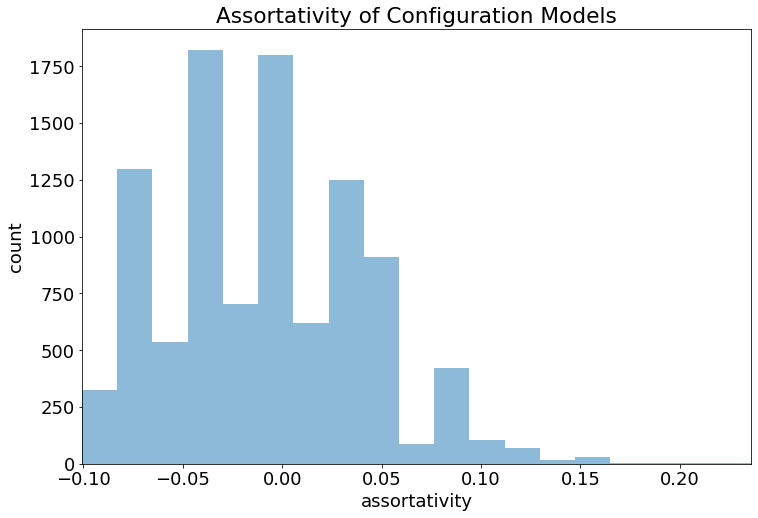

In [48]:
import numpy as np
from matplotlib import pyplot as plt

bins = np.linspace(min(vals), 
                   max(vals),
                   20) # fixed number of bins

plt.xlim([min(vals), max(vals)])

plt.hist(vals, bins=bins, alpha=0.5)
plt.title('Assortativity of Configuration Models')
plt.xlabel('assortativity')
plt.ylabel('count')

plt.show()

### Community Discussion

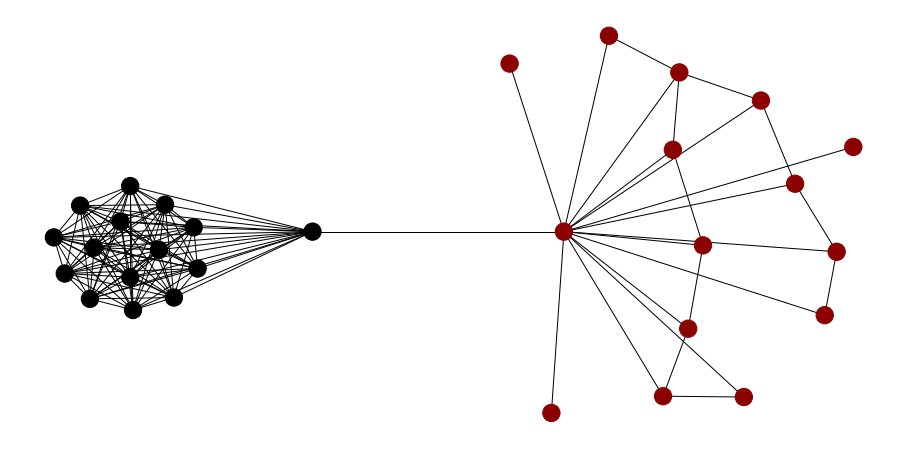

In [107]:
# Creating unbalanced barbell graph to demonstrate different community structures

import networkx as nx
import random
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 8) 

tot = 30
split = int(tot/2)

G = nx.Graph()
G.add_nodes_from([i for i in range(tot)])

for n in range(split):
    for m in range(split):
        G.add_edge(n,m)
for n in range(split,tot):
    for m in range(split,tot):
        if random.random() > 0.95:
            G.add_edge(n,m)
    G.add_edge(n,split+1)
G.add_edge(0,split+1)

f = plt.figure()

pos = {k:(k/tot,k/tot) for k in range(tot)}

pos[0] = (0.3, 0.5)
pos[1] = (0.01, 0.6)
pos[2] = (0.01, 0.4)
pos[(split+1)] = (0.7,0.5)
fixed = [0, 1, 2, (split+1)]

pos = nx.spring_layout(G, pos=pos, fixed=fixed)

node_color = [('black' if i < split else 'darkred') for i in range(tot)]
#node_color[1] = 'blue'
#node_color[2] = 'blue'
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_color)

plt.axis('off') # Hide border, (and make background transparent)
f.savefig(LATEX_DIR + 'barbell-unbalanced.png', bbox_inches='tight', pad_inches=0, dpi = 300)